In [3]:
!pip install geocoder
!pip install folium

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [55]:
pip install plotly

     |████████████████████████████████| 15.2 MB 338 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [1]:
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


In [2]:
import numpy as np
import pandas as pd

In [6]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[46.8182, 8.2275], zoom_start=8)

# display world map
world_map

In [8]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 141 kB/s eta 0:00:01
     |████████████████████████████████| 18.5 MB 469 kB/s eta 0:00:011
     |████████████████████████████████| 1.2 MB 26.7 MB/s eta 0:00:01
     |████████████████████████████████| 8.2 MB 14.2 MB/s eta 0:00:01
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import geopandas as gpd
f=r"/Users/yohanbizard/Documents/Documents - Yohan’s MacBook Pro/Documents/Documents/Immobilier/data/PLZO_SHP_LV03/PLZO_PLZ.shp"
shapes = gpd.read_file(f)
shapes.geometry=shapes.geometry.simplify(0.5)

In [10]:
import pyproj
from shapely.ops import transform

lv03 = pyproj.CRS('EPSG:21781')
wgs84 = pyproj.CRS('EPSG:4326')
project = pyproj.Transformer.from_crs(lv03, wgs84, 
                                          always_xy=True).transform

for i, shape in shapes.iterrows():
    if shape.geometry is not None:
        shape.geometry = transform(project, shape.geometry)
        shapes.iloc[i] = shape

<AxesSubplot:>

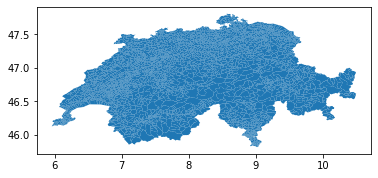

In [16]:
shapes.plot()

In [17]:
shapes

UUID  \
0     {0072F991-E46D-447E-A3BE-75467DB57FFC}   
1     {C3D3316F-1DFE-468E-BFC5-5C2308743B4C}   
2     {479E660B-A0A5-4297-AA66-FA62735EFDC6}   
3     {FDFBFFDF-11C2-4CC9-B903-EF17677388BF}   
4     {CB229C54-DF46-45A0-B75F-6E77240B4B03}   
5     {5B28EF42-165A-4C06-AC5B-BFB4068A7988}   
6     {6262A301-67E7-4095-BB32-9A62097205DE}   
7     {DCC5A542-C9B9-45B6-BD94-546E5B347A8F}   
8     {195005AC-2846-4DD3-A72C-32765AF4032A}   
9     {88E5D38E-75F1-4694-8C59-1968396A7BBC}   
10    {E6D65221-2598-49D3-BADE-C690CEA23721}   
11    {E33DF701-C11D-4D87-A660-1067B1677CB0}   
12    {2C2430F9-1F5B-42AF-AEC9-2ABA7EEDD70F}   
13    {1321B152-868D-485E-9540-813FEB5B109E}   
14    {B1290F81-97A6-4241-A557-44568AD79AB6}   
15    {C46EB230-BF3C-4B75-9F7D-048E1ACC4F33}   
16    {8C684F4E-C8CC-4FFA-866E-FECA051BC471}   
17    {8F3290B0-54BD-4897-9D89-6E90421C761E}   
18    {ECA56177-62D9-47B7-92A6-9E9CB9C03009}   
19    {3F6EE560-9739-49B6-B65C-DA92B74AA19A}   
20    {9566A37F-83B4-4182-A81A-32EA98C199BB}   
21    {EA34B036-B7ED-46CB-91AC-DE2CBADBE8E0}   
22    {16778F4B-9F7E-4C61-A488-966924A71E78}   
23    {4CC540A7-AB71-4E15-A637-79E452996272}   
24    {E07A07B1-D817-4B17-A38E-2DCF19F6CC9A}   
25    {C676B0ED-4BB1-41F7-8E4E-1E71DD4EA23D}   
26    {C2C89C82-CCF6-40AB-9E78-2D906A6737E2}   
27    {C0C58FB1-0427-4582-B45A-58DA4028F012}   
28    {F3D28A59-0DD7-4FF8-82AB-081DE5E6C85D}   
29    {77206F65-8C52-4C86-88BA-7C127E8E4B7C}   
30    {3D69AD22-E534-4F53-8ABB-8BAA241F2910}   
31    {493F127A-D422-4AEC-AF82-7A3605E04D92}   
32    {535CA6A1-40C9-4C5F-97C8-2CA30FA1406E}   
33    {5251AD11-4B1F-444D-AAD2-E1B196FB4292}   
34    {8417B2E5-8240-4893-ABA9-DE35181720E5}   
35    {BF00F09F-1DCE-4C37-9EE9-3BDA7957960D}   
36    {73BB93A8-444B-41A8-AD92-E2037B1AA9A2}   
37    {D271A6C8-0637-4341-AF66-E1408EFF8391}   
38    {82BF1BA5-19D5-405C-B54B-4AA86DF1B555}   
39    {4EB3B33A-35CC-4AE9-B743-7D7A33364144}   
40    {F84BCB77-81D1-4089-AB3B-5E7741B1656E}   
41    {09C31C6F-090E-4CA9-8AA0-F78F1BCC6928}   
42    {EF04EA9A-32E9-45BB-93D3-C43C5EC93F11}   
43    {A727C206-6A77-4093-907B-606E3F44DBF5}   
44    {2A3A8313-6374-4BC2-825A-CBEF83E8BEFD}   
45    {3289BAE8-4328-4907-B413-548FF1FCA01B}   
46    {9997CFC7-31C1-4845-8D60-1155FD74DC8A}   
47    {A5060D31-0D5C-42C8-B25B-9A0AC7441D52}   
48    {001E3BA1-1891-4609-811D-7745465358D6}   
49    {488D43C2-CAAA-409E-9693-AA8AEF9FBC43}   
50    {497930BF-5FE3-440C-96AE-73C0356F1B47}   
51    {715844EB-62EB-4925-9445-6632EF837A0F}   
52    {6587F483-EBD3-491B-8C0F-4FE3ADE2545D}   
53    {F21C0D28-44E2-4DF8-9A5C-6D29B3A69DD2}   
54    {3E4A5B5F-E7DA-4555-9AF2-8F8752F0F1DE}   
55    {7ED2A7C4-BCF2-4C75-849D-5214ABA54104}   
56    {C4ECA961-70DA-49B3-927C-4DC3257C0F73}   
57    {010FA27A-C6D5-467B-BB5B-80F4D796E5D6}   
58    {974AA42C-1B1E-4C02-B7EB-85FA63129AC5}   
59    {CB37A324-C4BE-42E4-9E85-BEEFB8703E56}   
60    {B79F1A16-945E-4048-875C-B7FCFFD26A35}   
61    {D40DCE6C-FA4E-4955-AFB3-F77C11031E1F}   
62    {9D87C353-F542-4261-994F-14F5842E14E8}   
63    {D8A32B5D-971E-4A19-B9CF-72A3E42AB9F8}   
64    {CE25B73E-DD1B-48B0-9B75-26258A6D7826}   
65    {D1F1334F-A811-4CEE-8723-CE4DDAFD10AC}   
66    {5229DA53-5C95-4B38-91B3-0A8747A6196B}   
67    {6ADC76D6-9EF4-44E7-95FB-ECE5BB2B62D2}   
68    {C110F179-FDDA-45A4-86F3-6DD848DC255E}   
69    {F3DA0486-0FCB-4F3A-B05F-B2DAFF9595C4}   
70    {33CCBB68-754A-4B3B-9F73-31BAE2F3B044}   
71    {C616EDA2-7844-499F-800C-15921348E245}   
72    {A5043060-D3C4-450D-9270-33A1316BD7C7}   
73    {CB46547A-9802-4F37-8BAD-6A275D3E20A9}   
74    {1AFE49C0-A4E8-43EB-97BC-287CA13AF29D}   
75    {786E57A1-E6DC-4ACB-9458-AB49BE1499EB}   
76    {3EF5C586-2E4B-459E-8544-5F0D6C60B9B3}   
77    {5448EFA6-BB18-4718-B766-5C11CD9295B1}   
78    {5A2CD3E7-0F07-44AD-893D-7C0EEB2B33BD}   
79    {AF6EA2F0-4133-4CB7-A959-E77F34E11AE4}   
80    {95CEECEC-2535-4874-BB2D-E649F0C7326F}   
81    {BCBA54F4-DE39-41A9-BF34-883F869F0156}   
82    {AC5F51F0-B904-44CD-B502-C4447FEEFE21}   
83    {5

In [25]:
shapes.dtypes

UUID          object
OS_UUID       object
STATUS        object
INAEND        object
PLZ            int64
ZUSZIFF        int64
geometry    geometry
dtype: object

In [18]:
data_path='/Users/yohanbizard/Documents/Documents - Yohan’s MacBook Pro/Documents/Documents/Immobilier/data/GE_retreated_20221106.csv'

In [19]:
data=pd.read_csv(data_path)
data

Price  Sizes                         titles  Postcode  \
0     4100000    185               Attique 6 pièces    1206.0   
1     2950000    255             Maison 10.5 pièces    1212.0   
2     1750000    167           Appartement 6 pièces    1281.0   
3    12000000    750               Maison 12 pièces    1257.0   
4     1390000    113           Appartement 5 pièces    1281.0   
5     1690000    103         Appartement 4.5 pièces    1206.0   
6     1350000    105           Appartement 4 pièces    1281.0   
7     1890000    180       Maison contiguë 7 pièces    1294.0   
8     1350000    103               Attique 4 pièces    1213.0   
9     1550000    126           Appartement 7 pièces    1226.0   
10    1700000     85           Appartement 4 pièces    1205.0   
11    2590000    181               Villa 6.5 pièces    1253.0   
12    2080000    115               Attique 4 pièces    1203.0   
13    4950000    285                Maison 7 pièces    1255.0   
14    1560000    188           Appartement 6 pièces    1254.0   
15    1745000    114           Appartement 4 pièces    1206.0   
16     550000     29            Appartement 1 pièce       NaN   
17    2140000    204       Maison contiguë 7 pièces    1254.0   
18    4650000    313               Attique 8 pièces    1231.0   
19    2030000    139               Attique 5 pièces    1228.0   
20    2030000    139           Appartement 5 pièces       NaN   
21    2450000    190           Appartement 5 pièces    1222.0   
22    5700000    430               Maison 11 pièces    1254.0   
23    5500000    370      Maison contiguë 11 pièces    1218.0   
24    1850000    180                Maison 6 pièces       NaN   
25    2800000    166         Appartement 6.5 pièces    1206.0   
26    2790000    283           Appartement 7 pièces       NaN   
27    2590000    327           Appartement 6 pièces       NaN   
28    2290000    160       Maison contiguë 5 pièces    1218.0   
29    2650000    167       Maison contiguë 6 pièces    1246.0   
30    1290000    115           Appartement 4 pièces    1206.0   
31     930000     83           Appartement 3 pièces    1203.0   
32    2225000    133           Appartement 5 pièces    1227.0   
33    2350000    157           Appartement 4 pièces    1206.0   
34    1630000    118       Maison contiguë 5 pièces    1254.0   
35    1250000     86         Appartement 3.5 pièces       NaN   
36    2500000    193               Attique 7 pièces    1228.0   
37    1230000    110           Appartement 3 pièces    1254.0   
38    1630000    118       Maison contiguë 5 pièces    1254.0   
39    2180000    154           Appartement 6 pièces       NaN   
40    2030000    139           Appartement 5 pièces    1228.0   
41    1850000    180                Maison 6 pièces       NaN   
42    2690000    249               Attique 6 pièces    1203.0   
43    2030000    139           Appartement 5 pièces       NaN   
44    2200000    230          Appartement 12 pièces    1200.0   
45     550000     29            Appartement 1 pièce       NaN   
46    6700000    220                 Villa 7 pièces    1253.0   
47    4950000    285                Maison 7 pièces    1255.0   
48    1590000    117           Appartement 4 pièces    1281.0   
49    1290000    115           Appartement 4 pièces    1206.0   
50    1990000    140                Maison 5 pièces       NaN   
51    1390000     93               Attique 4 pièces    1226.0   
52    1590000     96           Appartement 4 pièces    1207.0   
53   12000000    750               Maison 12 pièces    1257.0   
54    2090000    144       Maison contiguë 5 pièces    1226.0   
55    1950000    206                Maison 7 pièces    1242.0   
56    2050000    119           Appartement 5 pièces    1202.0   
57    1230000    110           Appartement 3 pièces    1254.0   
58    3175000    241           Appartement 8 pièces    1206.0   
59    5700000    430               Maison 11 pièces    1254.0   
60    4600000    263                Maison 

In [22]:
data = data.dropna(subset=['Postcode'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 850
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     731 non-null    int64  
 1   Sizes     731 non-null    int64  
 2   titles    731 non-null    object 
 3   Postcode  731 non-null    float64
 4   City      727 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.3+ KB


In [24]:
data['Postcode'].astype('int64')
data.dtypes

Price         int64
Sizes         int64
titles       object
Postcode    float64
City         object
dtype: object

In [28]:
data['Price_perSM']=round(data['Price']/data['Sizes'],2)
data

Price  Sizes                         titles  Postcode  \
0     4100000    185               Attique 6 pièces    1206.0   
1     2950000    255             Maison 10.5 pièces    1212.0   
2     1750000    167           Appartement 6 pièces    1281.0   
3    12000000    750               Maison 12 pièces    1257.0   
4     1390000    113           Appartement 5 pièces    1281.0   
5     1690000    103         Appartement 4.5 pièces    1206.0   
6     1350000    105           Appartement 4 pièces    1281.0   
7     1890000    180       Maison contiguë 7 pièces    1294.0   
8     1350000    103               Attique 4 pièces    1213.0   
9     1550000    126           Appartement 7 pièces    1226.0   
10    1700000     85           Appartement 4 pièces    1205.0   
11    2590000    181               Villa 6.5 pièces    1253.0   
12    2080000    115               Attique 4 pièces    1203.0   
13    4950000    285                Maison 7 pièces    1255.0   
14    1560000    188           Appartement 6 pièces    1254.0   
15    1745000    114           Appartement 4 pièces    1206.0   
17    2140000    204       Maison contiguë 7 pièces    1254.0   
18    4650000    313               Attique 8 pièces    1231.0   
19    2030000    139               Attique 5 pièces    1228.0   
21    2450000    190           Appartement 5 pièces    1222.0   
22    5700000    430               Maison 11 pièces    1254.0   
23    5500000    370      Maison contiguë 11 pièces    1218.0   
25    2800000    166         Appartement 6.5 pièces    1206.0   
28    2290000    160       Maison contiguë 5 pièces    1218.0   
29    2650000    167       Maison contiguë 6 pièces    1246.0   
30    1290000    115           Appartement 4 pièces    1206.0   
31     930000     83           Appartement 3 pièces    1203.0   
32    2225000    133           Appartement 5 pièces    1227.0   
33    2350000    157           Appartement 4 pièces    1206.0   
34    1630000    118       Maison contiguë 5 pièces    1254.0   
36    2500000    193               Attique 7 pièces    1228.0   
37    1230000    110           Appartement 3 pièces    1254.0   
38    1630000    118       Maison contiguë 5 pièces    1254.0   
40    2030000    139           Appartement 5 pièces    1228.0   
42    2690000    249               Attique 6 pièces    1203.0   
44    2200000    230          Appartement 12 pièces    1200.0   
46    6700000    220                 Villa 7 pièces    1253.0   
47    4950000    285                Maison 7 pièces    1255.0   
48    1590000    117           Appartement 4 pièces    1281.0   
49    1290000    115           Appartement 4 pièces    1206.0   
51    1390000     93               Attique 4 pièces    1226.0   
52    1590000     96           Appartement 4 pièces    1207.0   
53   12000000    750               Maison 12 pièces    1257.0   
54    2090000    144       Maison contiguë 5 pièces    1226.0   
55    1950000    206                Maison 7 pièces    1242.0   
56    2050000    119           Appartement 5 pièces    1202.0   
57    1230000    110           Appartement 3 pièces    1254.0   
58    3175000    241           Appartement 8 pièces    1206.0   
59    5700000    430               Maison 11 pièces    1254.0   
60    4600000    263                Maison 8 pièces    1255.0   
61    2500000    193               Attique 7 pièces    1228.0   
62    4900000    200                 Villa 9 pièces    1246.0   
64    3300000    210                         Maison    1214.0   
65    2150000    142           Appartement 5 pièces    1206.0   
66    3190000    161       Maison contiguë 6 pièces    1246.0   
67    2100000    138           Appartement 5 pièces    1202.0   
68    1630000    118       Maison contiguë 5 pièces    1254.0   
69   13900000    400                 Villa 8 pièces    1245.0   
70    1950000    206                Maison 7 pièces    1242.0   
71    2225000    133           Appartement 5 pièces    1227.0   
72    1290000    115           Appartement 

In [40]:
price_per_city=data.groupby(['City', 'Postcode'],as_index=False).mean()
price_per_city

City   Postcode          Price     Sizes  Price_perSM
0         Aire-la-Ville 1288.00000  1563333.33333 141.66667  11035.30333
1               Anières 1247.00000  4800000.00000 307.60000  15753.69950
2       Athenaz (Avusy) 1285.00000  2208888.88889 230.77778   9623.62333
3                Avully 1237.00000  8212500.00000 563.25000  13455.88250
4                  Aïre 1219.00000  2193333.33333 146.00000  14792.31000
5             Bardonnex 1257.00000  4200000.00000 500.00000   8400.00000
6              Bellevue 1293.00000  3171176.47059 264.05882  12317.06588
7                Bernex 1233.00000  2012500.00000 180.08333  10893.71250
8            Carouge GE 1227.00000  2363750.00000 150.00000  16409.79375
9              Chambésy 1292.00000  1250000.00000 115.00000  11139.37000
10               Chancy 1284.00000  1903333.33333 260.88889   7465.72111
11              Choulex 1244.00000  1115000.00000  93.00000  11989.25000
12           Châtelaine 1219.00000  1387142.85714 123.00000  12007.05286
13      Chêne-Bougeries 1224.00000  4285300.00000 221.10000  17697.08150
14          Chêne-Bourg 1225.00000  1524000.00000 122.00000  12872.38000
15             Cointrin 1216.00000  2025555.55556 159.22222  12736.54000
16               Collex 1239.00000  1790000.00000 200.00000   8950.00000
17   Collonge-Bellerive 1245.00000  8673846.15385 423.38462  17970.04692
18              Cologny 1223.00000  9281333.33333 350.86667  26218.87311
19              Conches 1231.00000  4483333.33333 282.22222  16337.55556
20            Confignon 1232.00000  3323333.33333 218.66667  15487.39667
21           Corsier GE 1246.00000  2435000.00000 149.50000  15274.22000
22              Céligny 1298.00000  6000000.00000 300.00000  20000.00000
23             Dardagny 1283.00000  1999285.71429 227.57143   8712.55214
24              Genthod 1294.00000  2156428.57143 169.78571  12864.28000
25               Genève 1200.00000  2283333.33333 206.66667  11480.98000
26               Genève 1201.00000  3703529.41176 250.88235  14997.79000
27               Genève 1202.00000  2327777.77778 141.22222  16773.44111
28               Genève 1203.00000  1550000.00000 115.73333  13930.67400
29               Genève 1204.00000  6053333.33333 234.11111  24663.72556
30               Genève 1205.00000  2669375.00000 156.62500  16858.05500
31               Genève 1206.00000  3122854.54545 172.00000  17660.03127
32               Genève 1207.00000  4711200.00000 213.40000  22260.50320
33               Genève 1208.00000  3387409.09091 155.59091  20438.17818
34               Genève 1209.00000  2620000.00000 194.62500  13392.92937
35          Grand-Lancy 1212.00000  2291428.57143 157.00000  14156.58143
36                   Gy 1251.00000  6330000.00000 402.60000  15584.41800
37             Hermance 1248.00000  4560666.66667 303.93333  13009.62667
38                Jussy 1254.00000  2372307.69231 188.76923  12490.91154
39    La Croix-de-Rozon 1257.00000 12000000.00000 750.00000  16000.00000
40            La Plaine 1283.00000  1450000.00000 202.00000   7178.22000
41    Le Grand-Saconnex 1218.00000  2983750.00000 208.07143  14264.18607
42            Le Lignon 1219.00000   785000.00000  84.00000   9353.20000
43              Meinier 1252.00000  1926000.00000 181.00000  10839.31400
44               Meyrin 1217.00000  1759444.44444 172.77778  11397.61222
45                 Onex 1213.00000  1852000.00000 138.70000  12958.29200
46                Perly 1258.00000  1450000.00000 161.00000   9006.21000
47          Petit-Lancy 1213.00000  2039285.71429 161.14286  12693.82714
48      Plan-les-Ouates 1228.00000  1988846.15385 151.30769  13159.49615
49             Puplinge 1241.00000  1659166.66667 167.16667  10452.73833
50               Russin 1281.00000  1653333.33333 155.33333  11578.30500
51              Satigny 1242.00000  1850000.00000 168.20000  11010.82900
52               Thônex 1226.00000  2388580.64516 202.35484  13313.71742
53              Troinex 1256.00000  3650000.00000 265.00000  13773.58000
54  

In [47]:
price_per_city['Postcode']=price_per_city['Postcode'].astype('int64')

In [48]:
price_per_city.dtypes

City            object
Postcode         int64
Price          float64
Sizes          float64
Price_perSM    float64
dtype: object

In [ ]:
price_per_city['Postcode']

In [62]:
merged = shapes.set_index('PLZ').join(price_per_city.set_index('Postcode'))
merged = merged.dropna(subset=['Price_perSM'])
merged = merged.dropna(subset=['City'])
merged

UUID  \
1201  {5CE53C00-4565-4D02-A695-7DEE2B916405}   
1202  {5BCFFFAB-44EC-4FA9-933B-0EFE6BB05565}   
1203  {54A45D65-97A3-45A1-8DB2-FA3E6E540269}   
1204  {FCB46C5D-6DDB-47B4-BC27-AA674D0CB3A9}   
1205  {F97E72AA-A260-4075-B3AE-F87FEDE38726}   
1206  {D924C540-1604-4E4A-9C30-A31E36299921}   
1207  {B5EA9714-EF37-41F0-B481-F59A93221892}   
1208  {6C0C2A10-B4FA-43B9-A9B2-8DACE70978A5}   
1209  {3D367D5E-04A6-4FF4-9C6D-DD16E3D70903}   
1212  {858FAD4E-0575-4E45-8035-17C853A123B2}   
1213  {695B7EF3-18A0-4886-9E97-143318E35CF9}   
1213  {695B7EF3-18A0-4886-9E97-143318E35CF9}   
1213  {F355EBD9-6CF5-432D-BB95-B7E429169148}   
1213  {F355EBD9-6CF5-432D-BB95-B7E429169148}   
1214  {450D405D-CA46-4508-B44C-4D2A7AC35982}   
1216  {AC6726A5-FC8D-48E2-9461-8F4C4F72E4D7}   
1217  {5B8789DE-86B8-4B5E-B8D8-6630702EBDD5}   
1218  {7D78092E-4CA8-4C43-B495-93BFD71072E1}   
1219  {82E79150-33D7-443F-8D63-6DF6D850103D}   
1219  {82E79150-33D7-443F-8D63-6DF6D850103D}   
1219  {82E79150-33D7-443F-8D63-6DF6D850103D}   
1219  {F5EC8401-A7F3-4D00-B6EC-685D7FD1035C}   
1219  {F5EC8401-A7F3-4D00-B6EC-685D7FD1035C}   
1219  {F5EC8401-A7F3-4D00-B6EC-685D7FD1035C}   
1219  {58945318-A4C5-4C1C-B98C-AD1B4E3C85CF}   
1219  {58945318-A4C5-4C1C-B98C-AD1B4E3C85CF}   
1219  {58945318-A4C5-4C1C-B98C-AD1B4E3C85CF}   
1222  {BE5DE14E-47AB-48B9-B3DC-69672F523FA4}   
1223  {766E846A-B49F-4FDE-84EB-59D7A4379081}   
1224  {21D4C2B4-0C2A-4A83-A346-546690DE1986}   
1225  {3EA6A302-B74A-4DC6-9777-6C32462493B3}   
1226  {CBD3A896-1B0A-40FF-8978-9678836DB465}   
1227  {4A2798CA-A53C-4B1C-A307-90AB4803E621}   
1227  {B3DC0A5D-27CE-40B8-90C6-5FBFE3F0BA88}   
1228  {577C3CEA-E8FA-4E94-AC2A-99EEF23306A0}   
1231  {AE689D5E-9B4B-465C-90E1-6EEB67AF5F9D}   
1232  {D1D82770-8B31-4526-B17C-4F1EF96C7D30}   
1233  {6BE3CABC-B00A-4E15-A88B-E06A8C1B9475}   
1234  {8B02C4D3-5C1A-4CAF-A040-D58B80026FD0}   
1237  {6B4CAA4E-DA12-4247-A7F8-A321685ABE3B}   
1239  {8EF4CBBE-01E3-43BB-83AD-DFCA6F2B789A}   
1241  {214355E3-FF90-4015-9CB3-981DE6187FC6}   
1242  {DD701145-77FE-4123-B99F-783FD3DD1CBE}   
1244  {0289C70E-85CD-4730-BCCC-E57382959413}   
1245  {F4DCFFE4-00CA-44DD-B000-0E36A44AD952}   
1246  {B8BA48CA-07F8-4B81-899B-F82AFC102FB8}   
1247  {27B60BCC-3188-4F7C-8F7F-F7B78AF4B7B0}   
1248  {411AC227-AD7D-42FE-BE50-2DDC754ACC33}   
1251  {76ED7EE1-C701-48AB-BDDE-D8A26268AC96}   
1252  {3565C4BC-8FC6-4113-9359-6BFB78A541E2}   
1253  {46EFBE0B-AA3B-494B-A7AC-862DF54710E1}   
1254  {3F890464-6A0D-4969-BFBA-8C2BD7A177C6}   
1255  {FB05811B-2B4F-4B96-A5C3-806736CF6889}   
1256  {57AE7FE7-66F7-4590-9718-5AA3BB3C562A}   
1257  {19A67FF1-2E36-4978-BD0A-21C19DD46D08}   
1257  {19A67FF1-2E36-4978-BD0A-21C19DD46D08}   
1258  {4D7B1364-9DA9-4F8F-A908-98807FF5ECBB}   
1281  {F4CE6082-C85E-4F67-BB58-29E8E8403F89}   
1283  {4E74A932-16A5-466A-96DF-F087C7BDFD14}   
1283  {4E74A932-16A5-466A-96DF-F087C7BDFD14}   
1283  {AA82E9A1-5725-4149-91FD-3EE540E4A0A5}   
1283  {AA82E9A1-5725-4149-91FD-3EE540E4A0A5}   
1284  {43E6AD1C-6C6A-4057-A0C9-04467BF7961A}   
1285  {C5390B3D-E5EA-4E39-89B4-D9A0E86CDB27}   
1288  {B726F710-F3CB-4C34-A750-D0EA7B1B3534}   
1290  {CB41CC65-6F32-40AB-962F-117AD5485C1C}   
1290  {D352F71C-0F38-4EB6-9042-E1F1FD68609C}   
1292  {14CC1CC6-C839-47CA-B9D9-D4C7906467CF}   
1293  {D33272C6-CFF0-4285-ABD2-82D7B77603DE}   
1294  {BCD4D3F8-CCB4-4047-862D-9F77FFD575CA}   
1298  {EF1022DD-D19F-400B-B65A-0895B64298E9}   
1298  {7D3425A4-F87D-45AB-9831-B5696F32CD56}   

                                     OS_UUID STATUS INAEND  ZUSZIFF  \
1201  {5DF8DDBE-8D41-42A3-8F30-F9E716E39C75}   real   nein        0   
1202  {5DF8DDBE-8D41-42A3-8F30-F9E716E39C75}   real   nein        0   
1203  {5DF8DDBE-8D41-42A3-8F30-F9E716E39C75}   real   nein        0   
1204  {5DF8DDBE-8D41-42A3-8F30-F9E716E39C75}   real   nein        0   
1205  {5DF8DDBE-8D41-42A3-8F30-F9E716E39C75}   real   nein        0   
1206  {5DF8DDBE-8D41-42A3-8F30-F9E716E39C75}   real   nein        0   
1207  {5DF8DDBE-8D41-42A3-8F30-F9E716E

In [63]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 72 entries, 1201 to 1298
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   UUID         72 non-null     object  
 1   OS_UUID      72 non-null     object  
 2   STATUS       72 non-null     object  
 3   INAEND       72 non-null     object  
 4   ZUSZIFF      72 non-null     int64   
 5   geometry     72 non-null     geometry
 6   City         72 non-null     object  
 7   Price        72 non-null     float64 
 8   Sizes        72 non-null     float64 
 9   Price_perSM  72 non-null     float64 
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 6.2+ KB


In [71]:
import plotly.express as px
import plotly.graph_objs as go

In [73]:
fig = px.choropleth_mapbox(merged, geojson=merged.geometry, 
                           locations=merged.index, 
                           color='Price_perSM',
                           hover_name = 'City',
                           mapbox_style="carto-positron",
                           zoom=6.3, 
                           center = {"lat": 46.2044, "lon": 6.1432},
                           opacity=0.5,
                          )
fig.show()

In [74]:
fig.write_html("/Users/yohanbizard/Documents/Documents - Yohan’s MacBook Pro/Documents/Documents/Immobilier/map.html")